In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx


In [5]:
users =pd.read_csv("Data/users.csv",sep="\t",encoding="latin-1")
movies =pd.read_csv("Data/movies.csv",sep="\t",encoding="latin-1")
ratings =pd.read_csv("Data/ratings.csv",sep="\t",encoding="latin-1")

Text(0.5, 1.0, 'bipartite sub graph of ratings')

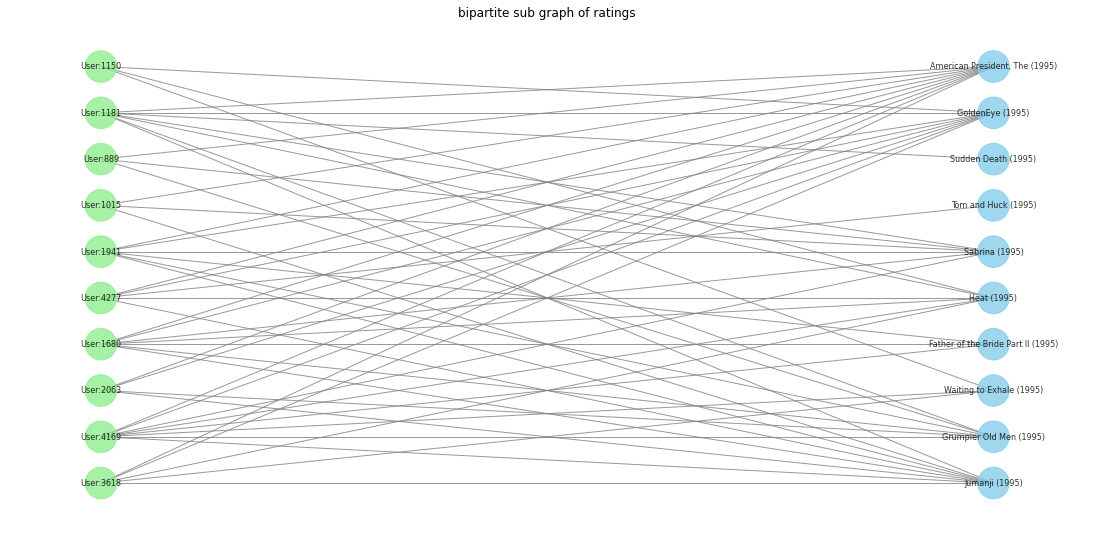

In [6]:
num_movies_nodes = 10
start = 1
num_users_nodes = 10
movies_nodes = movies["movie_id"][1:1+num_movies_nodes].to_list()
movies_nodes_titles = movies["title"][1:1+num_movies_nodes].to_list()
users_nodes = ratings["user_id"].value_counts()[:num_users_nodes].index.to_list()

ratings_edges = ratings.query("user_id in @users_nodes & movie_id in @movies_nodes")



graph = nx.Graph()
for user_id in users_nodes:
    graph.add_node(user_id,label=f"User:{user_id}",bipartite=0)
 
    
for i in range(len(movies_nodes)):
    graph.add_node(movies_nodes[i],label=movies_nodes_titles[i],bipartite=1)


labels = nx.get_node_attributes(graph, 'label')

graph.add_edges_from(ratings_edges[["user_id","movie_id"]].values)

colors = ["lightgreen" if node in users_nodes else "skyblue" for node in graph.nodes]

plt.figure(figsize=(15,7))
pos = nx.bipartite_layout(graph,nodes=users_nodes)
nx.draw(graph, pos, node_size=1000, with_labels=True, font_size=8, alpha=0.8, font_color='black', edge_color='gray',node_color=colors,labels=labels)
plt.title("bipartite subgraph of ratings")

Movies :3883
genres ['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']
num Genres 18


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


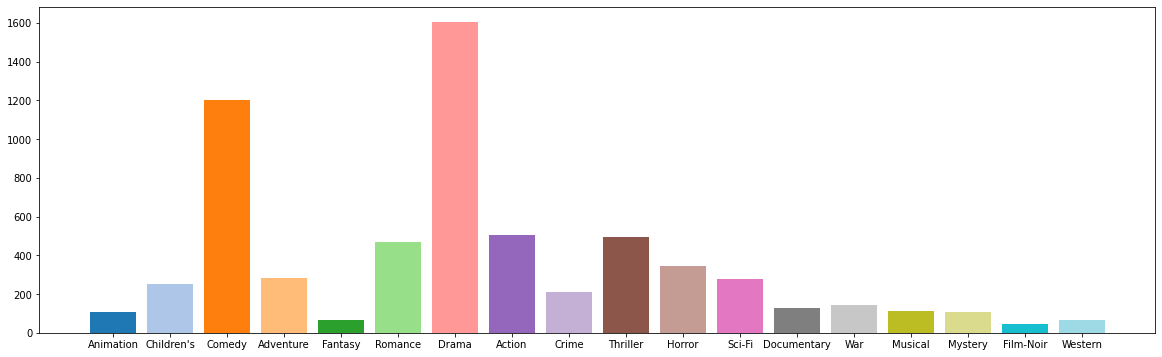

In [7]:
print(f"Movies :{movies.shape[0]}")
genres = movies["genres"].apply(lambda x:x.split("|"))
gernes = [genre for sublist in genres for genre in sublist ]
genre_counts = dict(Counter(gernes))


print("genres",list(genre_counts.keys()))
print(f"num Genres {len(genre_counts)}")

#Plot 
colors = plt.cm.tab20(np.linspace(0,1,len(genre_counts)))
plt.figure(figsize=(20,6))
plt.bar(genre_counts.keys(),genre_counts.values(),color=colors)


movies.head()

users :6040


,user_id,gender,age,occupation,zipcode
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


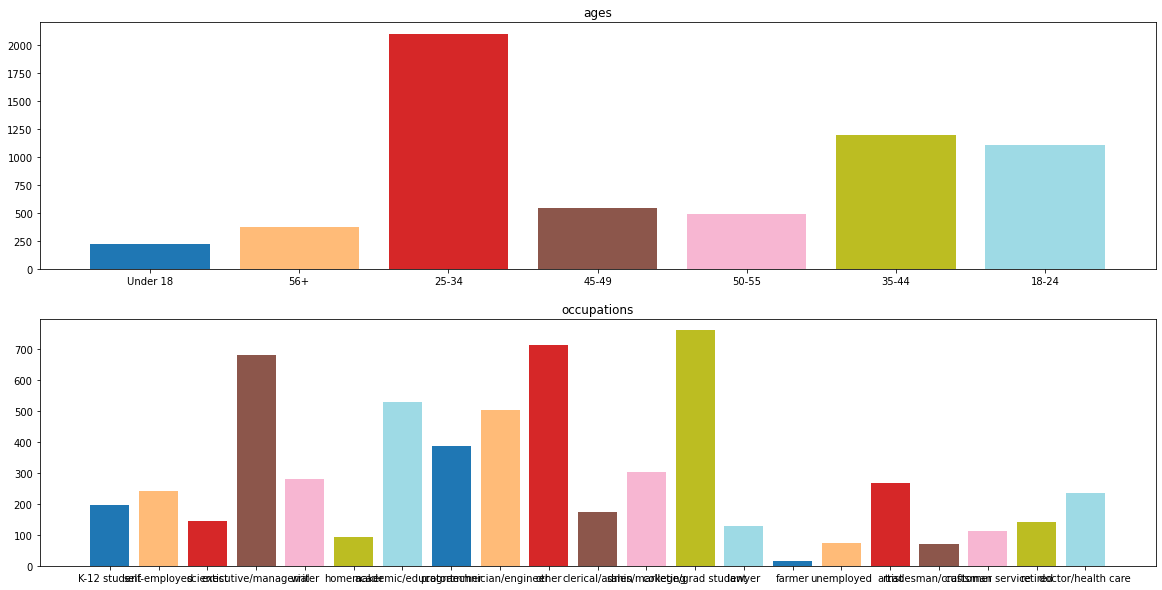

In [8]:
print(f"users :{users.shape[0]}")
ages_count = Counter(users["age"])
oc_count = Counter(users["occupation"])

colors = plt.cm.tab20(np.linspace(0,1,len(ages_count.keys())))
colors_oc = plt.cm.tab20(np.linspace(0,1,len(oc_count.keys())))


fig, axs = plt.subplots(2, 1 ,figsize=(20, 10))

axs[0].bar(ages_count.keys(),ages_count.values(),color=colors)
axs[0].set_title('ages')

axs[1].bar(oc_count.keys(),oc_count.values(),color=colors)
axs[1].set_title('occupations')
users.head()

ratings:1000209
ratingss [5, 3, 4, 2, 1]
num ratingss 5


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


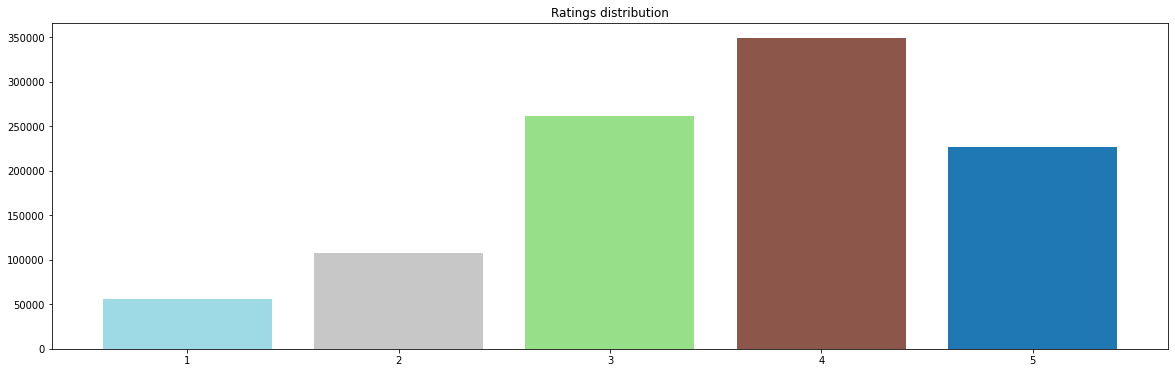

In [9]:
print(f"ratings:{ratings.shape[0]}")
ratings_counts = Counter(ratings["rating"].values)
print("ratingss",list(ratings_counts.keys()))
print(f"num ratingss {len(ratings_counts)}")

#Plot 
colors = plt.cm.tab20(np.linspace(0,1,len(ratings_counts)))
plt.figure(figsize=(20,6))
plt.bar(ratings_counts.keys(),ratings_counts.values(),color=colors)
plt.title("Ratings distribution")
ratings.head()